In [314]:
#Importando a biblioteca pandas
import pandas as pd

In [315]:
#Lendo a planilha Excel e armazenando na variável df_desenvolvimento
df_desenvolvimento = pd.read_excel(
    'HDR25_Statistical_Annex_Tables_1-7.xlsx',
    sheet_name='Desenvolvimento'
)
df_desenvolvimento.head()

,País,IDH,ESCOLARIDADE,PIB PER CAPITA
0,Liechtenstein,0.938,12.409959,166811.67410
1,Norway,0.970,13.117962,112710.02110
2,Singapore,0.946,11.990000,111239.22910
3,Qatar,0.886,10.770000,105353.26800
4,Ireland,0.949,11.725000,90884.63459


In [316]:
#Lendo a planilha Excel e armazenando na variável df_pais_continente
df_continente = pd.read_excel(
    'HDR25_Statistical_Annex_Tables_1-7.xlsx',
    sheet_name='País - Continente'
)

df_continente.head()


,País,Continente
0,Iceland,Europa
1,Norway,Europa
2,Switzerland,Europa
3,Denmark,Europa
4,Germany,Europa


In [317]:
#Convertendo os nomes dos países para letras minúsculas
df_continente['País'] = df_continente['País'].str.lower()
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.lower()

In [318]:
#Exibindo as primeiras linhas dos continentes
df_continente.head()

,País,Continente
0,iceland,Europa
1,norway,Europa
2,switzerland,Europa
3,denmark,Europa
4,germany,Europa


In [319]:
df_desenvolvimento.head()

,País,IDH,ESCOLARIDADE,PIB PER CAPITA
0,liechtenstein,0.938,12.409959,166811.67410
1,norway,0.970,13.117962,112710.02110
2,singapore,0.946,11.990000,111239.22910
3,qatar,0.886,10.770000,105353.26800
4,ireland,0.949,11.725000,90884.63459


In [320]:
#Removendo pontos dos nomes dos países e continentes caso tenha
df_continente['Continente'] = df_continente['Continente'].str.replace('.', ' ')
df_continente['País'] = df_continente['País'].str.replace('.', ' ')
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.replace('.', ' ')

In [321]:
#Conferindo os dataframes após as alterações
df_desenvolvimento.head()

,País,IDH,ESCOLARIDADE,PIB PER CAPITA
0,liechtenstein,0.938,12.409959,166811.67410
1,norway,0.970,13.117962,112710.02110
2,singapore,0.946,11.990000,111239.22910
3,qatar,0.886,10.770000,105353.26800
4,ireland,0.949,11.725000,90884.63459


In [322]:
#Conferindo os dataframes após as alterações
df_continente.head()

,País,Continente
0,iceland,Europa
1,norway,Europa
2,switzerland,Europa
3,denmark,Europa
4,germany,Europa


In [323]:
#Função para remover espaços em branco excessivos entre as palavras dos nomes dos países e continentes caso exista
def remove_espacos_excessivos(nome_original):
    #Removendo espaços em branco no início e no final do nome
    nome_primeiro_ajuste = nome_original.strip()
    #Removendo espaços em branco duplicados entre as palavras do nome
    nome_ajustado = ' '.join(nome_primeiro_ajuste.split())
    return nome_ajustado

#Aplicando a função para remover espaços em branco excessivos
df_desenvolvimento['País'] = df_desenvolvimento['País'].apply(remove_espacos_excessivos)
df_continente['Continente'] = df_continente['Continente'].apply(remove_espacos_excessivos)
df_continente['País'] = df_continente['País'].apply(remove_espacos_excessivos)

In [324]:
#Conferindo os dataframes após as alterações
df_desenvolvimento.head()

,País,IDH,ESCOLARIDADE,PIB PER CAPITA
0,liechtenstein,0.938,12.409959,166811.67410
1,norway,0.970,13.117962,112710.02110
2,singapore,0.946,11.990000,111239.22910
3,qatar,0.886,10.770000,105353.26800
4,ireland,0.949,11.725000,90884.63459


In [325]:
#Conferindo os dataframes após as alterações
df_continente.head()

,País,Continente
0,iceland,Europa
1,norway,Europa
2,switzerland,Europa
3,denmark,Europa
4,germany,Europa


In [326]:
#Realizando o merge entre os dataframes df_desenvolvimento e df_continente
df_completo = df_desenvolvimento.merge(right=df_continente, on='País', how='right')

df_completo.head()

,País,IDH,ESCOLARIDADE,PIB PER CAPITA,Continente
0,iceland,0.972,13.908926,69116.93736,Europa
1,norway,0.970,13.117962,112710.02110,Europa
2,switzerland,0.970,13.949121,81948.90177,Europa
3,denmark,0.962,13.027321,76007.85669,Europa
4,germany,0.959,14.296372,64053.22124,Europa


In [327]:
#Verificando a quantidade de valores nulos na coluna Continente do dataframe df_completo
df_completo['Continente'].isna().sum()

np.int64(0)

In [328]:
#Exibindo as informações do dataframe df_completo
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   País            193 non-null    object 
 1   IDH             193 non-null    float64
 2   ESCOLARIDADE    193 non-null    float64
 3   PIB PER CAPITA  193 non-null    float64
 4   Continente      193 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


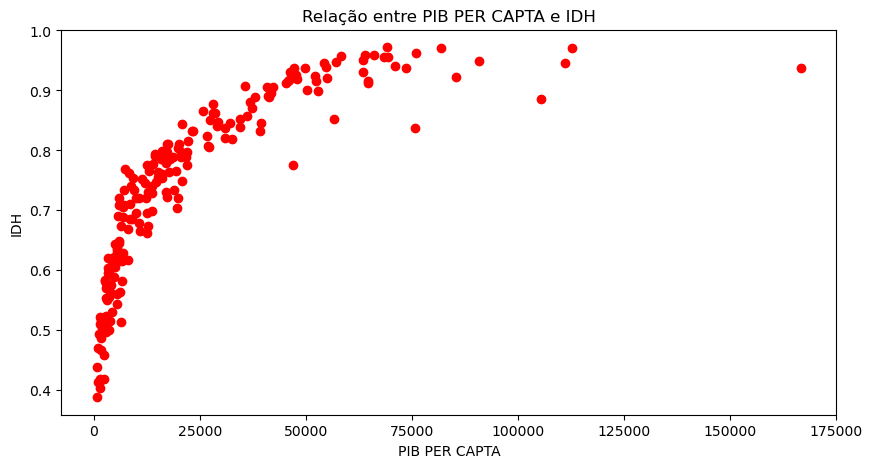

In [335]:
#Existe alguma relação entre IDH e anos médios de escolaridade?
import matplotlib.pyplot as plt

#Crriar uma figura de tamanho especificado
plt.figure(figsize=(10, 5))

#Criar um gráfico de dispersão (scatter plot)
plt.scatter(
    df_completo['PIB PER CAPITA'],
    df_completo['IDH'],
    color='r')
#Adicionar título e rótulos aos eixos
plt.title('Relação entre PIB PER CAPTA e IDH')
plt.xlabel('PIB PER CAPTA')
plt.ylabel('IDH')

#Salvar o gráfico como uma imagem PNG
plt.savefig('relacao_PIB_IDH.png', dpi=300)

#Exibir o gráfico
plt.show()

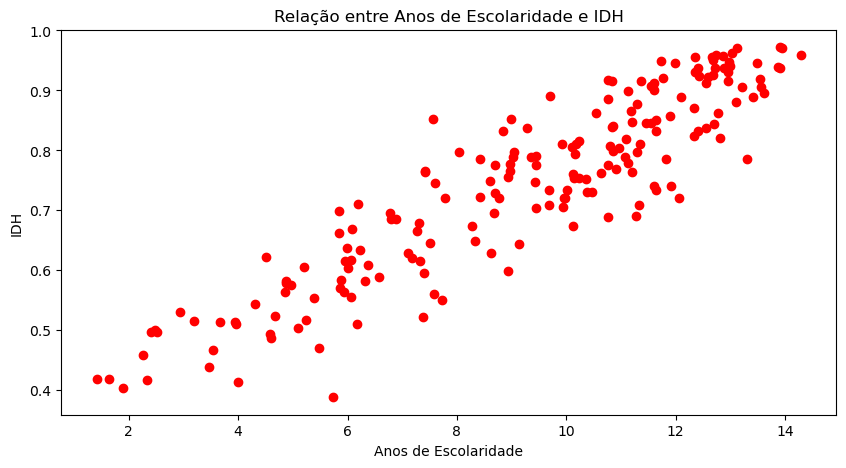

In [336]:
#Existe alguma relação entre IDH e Anos de Escolaridade?
plt.figure(figsize=(10,5))

#Gráfico de dispersão entre Anos de Escolaridade e IDH
plt.scatter(
    df_completo['ESCOLARIDADE'],
    df_completo['IDH'],
    color='r')

#Adicionando título e rótulos aos eixos
plt.title('Relação entre Anos de Escolaridade e IDH')
plt.xlabel('Anos de Escolaridade')
plt.ylabel('IDH')

#Salvar o gráfico como uma imagem PNG
plt.savefig('relacao_escolaridade_IDH.png', dpi=300)

#Exibindo o gráfico
plt.show()

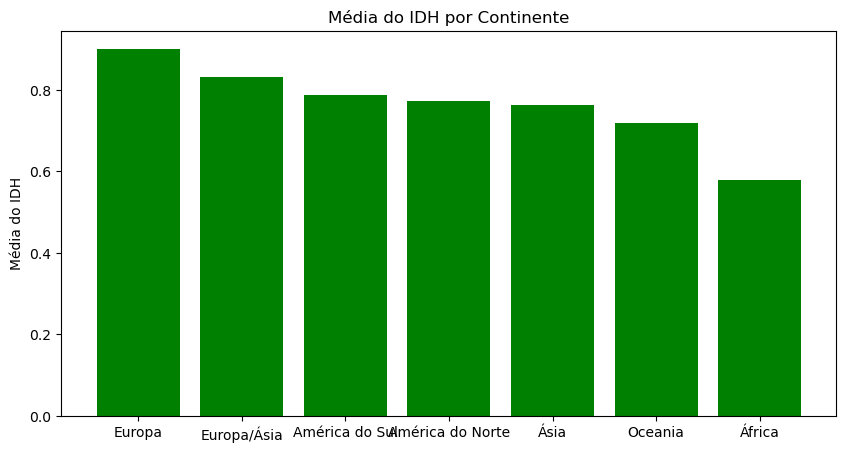

In [337]:
#Qual a média do IDH por continente?
#Agrupando por continente e calculando a média do IDH
media_por_continente = (df_completo.groupby('Continente')['IDH'].mean().to_frame().reset_index()).sort_values('IDH', ascending=False)

#Criar uma figura de tamanho especificado
plt.figure(figsize=(10,5))

#Gráfico de barras da média do IDH por continente
plt.bar(
    media_por_continente['Continente'],
    media_por_continente['IDH'],
    color='g')

#Adicionando título e rótulos aos eixos
plt.title('Média do IDH por Continente')
plt.ylabel('Média do IDH')

#Salvar o gráfico como uma imagem PNG
plt.savefig('media_IDH_continente.png', dpi=300)

#Exibindo o gráfico
plt.show()

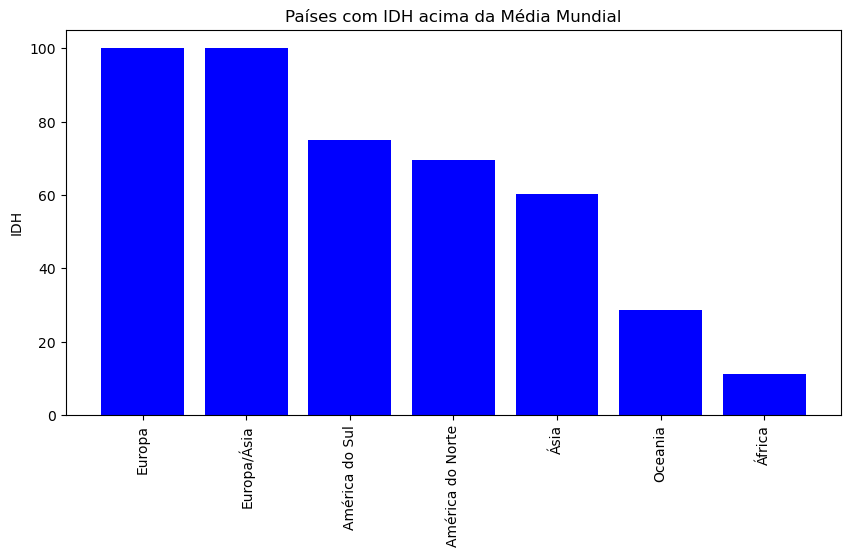

In [338]:
#Quantos países possuem IDH acima da média mundial?
#Calcula o número total de países
numero_total_paises = (df_completo.groupby(['Continente'])['País'].count().to_frame().reset_index()).sort_values(by= 'País', ascending=False)

# Calcula a média global
media_global = df_completo['IDH'].mean()

#Calcula o número de países com IDH acima da média global
paises_acima_media_global = df_completo[df_completo['IDH'] > media_global]

#Agrupa por continente e conta o número de países
numero_paises_acima_media_global = (paises_acima_media_global.groupby(['Continente'])['País'].count().to_frame().reset_index()).sort_values('País', ascending=False)

#Calcula o percentual de países com IDH acima da média global por continente
numero_paises_acima_media_global['percentual_acima_media'] = numero_paises_acima_media_global['País'] / numero_total_paises['País'] * 100
numero_paises_acima_media_global = numero_paises_acima_media_global.sort_values('percentual_acima_media', ascending=False)
numero_paises_acima_media_global

#Criar uma figura de tamanho especificado
plt.figure(figsize=(10,5))

#Gráfico de barras dos países com IDH acima da média mundial
plt.bar(
    numero_paises_acima_media_global['Continente'],
    numero_paises_acima_media_global['percentual_acima_media'],
    color='b')

#Adicionando título e rótulos aos eixos
plt.title('Países com IDH acima da Média Mundial')
plt.ylabel('IDH')
plt.xticks(rotation=90)

#Salvar o gráfico como uma imagem PNG
plt.savefig('paises_IDH_acima_media.png', dpi=300)

#Exibindo o gráfico
plt.show()

In [334]:
df_completo.to_csv('tabela_idh_por_pais_e_continente.csv', index=False, sep=';', encoding='utf-8')